# importer les librairies

In [1]:
import pandas as pd
import chardet
from pandas_profiling import ProfileReport
import glob
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\33619\AppData\Local\Temp\ipykernel_8288\4090154498.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Trouver le bon encoding pour lire les fichiers et les ouvrir avec

In [2]:
file_pattern = "Base_OP_*_Nationale.csv"
files = glob.glob(file_pattern)

all_dataframes = []

for file_name in files:
    with open(file_name, 'rb') as file:
        result = chardet.detect(file.read())
    
    df = pd.read_csv(file_name, encoding=result['encoding'], sep=';')
    all_dataframes.append(df)

# Concaténer tous les dataframes
combined_df = pd.concat(all_dataframes, ignore_index=True)

In [3]:
combined_df.head()

,Observatory,Data_year,agglomeration,Zone_complementaire,Type_habitat,epoque_construction_homogene,anciennete_locataire_homogene,nombre_pieces_homogene,loyer_1_decile,loyer_1_quartile,...,loyer_mensuel_1_quartile,loyer_mensuel_median,loyer_mensuel_3_quartile,loyer_mensuel_9_decile,moyenne_loyer_mensuel,surface_moyenne,nombre_obsservations,nombre_logements,methodologie_production,nombre_observations
0,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,NaN,"9,9","11,3",...,537.0,679.0,838.0,1030.0,718.0,55.0,22238.0,NaN,Estimation directe,NaN
1,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Maison 1-3P,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Ensemble 4P et plus,8,"9,9",...,814.0,1019.0,1262.0,1500.0,1082.0,95.0,2624.0,NaN,Estimation directe,NaN
3,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Maison 4P et plus,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Appart 1P,"12,4","14,7",...,416.0,480.0,557.0,650.0,493.0,29.0,5226.0,NaN,Estimation directe,NaN


In [51]:
# Create a dictionary to map agglomerations to departments
agglomeration_department_map = {
    'Agglomération de Brest': '29',
    'Agglomération de Châteauroux': '36',
    'Agglomération de Draguignan': '83',
    'Agglomération de Fréjus': '83',
    'Agglomération de Nancy': '54',
    'Agglomération de Nîmes': '30',
    'Agglomération de Toulon': '83',
    'Agglomération de Toulouse': '31',
    'Auray Quiberon Terre Atlantique': '56',
    'Golfe du Morbihan - Vannes Agglomération': '56',
    'Lorient Agglomération': '56',
    'Agglomération d\'Aix-Marseille': '13',
    'Agglomération d\'Alençon': '61',
    'Agglomération d\'Arles': '13',
    'Agglomération de Besançon': '25',
    'Agglomération de Lille': '59',
    'Agglomération de Lyon': '69',
    'Agglomération de Montpellier': '34',
    'Agglomération de Nantes': '44',
    'Agglomération de Nice-Menton': '06',
    'Agglomération de Rennes': '35',
    'Agglomération de Saint Denis (La Réunion)': '974',
    'Agglomération de Sète': '34',
    'Agglomération parisienne': '75,77,78,91,92,93,94,95',
    'Agglomération parisienne (hors Paris)': '77,78,91,92,93,94,95',
    'Paris intra-muros': '75',
    'Sud Loire - proche Haute-Loire': '42',
    'Unité urbaine de l\'agglomération de Bayonne': '64'
}

# Add a new column to combined_df that maps each agglomeration to its corresponding department
combined_df['departement'] = combined_df['agglomeration'].map(agglomeration_department_map)


In [61]:
combined_df = combined_df.drop('department', axis=1)
combined_df.head()

,Observatory,Data_year,agglomeration,Zone_complementaire,Type_habitat,epoque_construction_homogene,anciennete_locataire_homogene,nombre_pieces_homogene,loyer_1_decile,loyer_1_quartile,...,loyer_mensuel_1_quartile,loyer_mensuel_median,loyer_mensuel_3_quartile,loyer_mensuel_9_decile,moyenne_loyer_mensuel,surface_moyenne,nombre_logements,methodologie_production,nombre_observations,departement
0,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,NaN,"9,9","11,3",...,537.0,679.0,838.0,1030.0,718.0,55.0,NaN,Estimation directe,22238.0,06
1,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Maison 1-3P,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,06
2,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Ensemble 4P et plus,8,"9,9",...,814.0,1019.0,1262.0,1500.0,1082.0,95.0,NaN,Estimation directe,2624.0,06
3,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Maison 4P et plus,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,06
4,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Appart 1P,"12,4","14,7",...,416.0,480.0,557.0,650.0,493.0,29.0,NaN,Estimation directe,5226.0,06


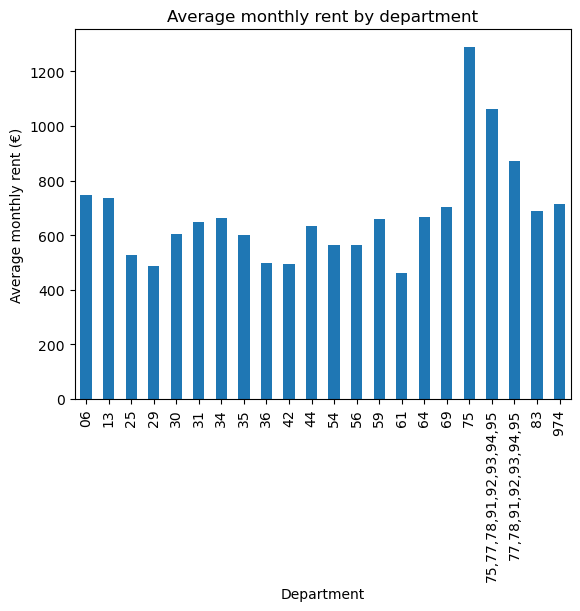

In [64]:
# group the data by department and calculate the mean rent
rent_by_dept = combined_df.groupby('departement')['moyenne_loyer_mensuel'].mean()

# create a bar chart
rent_by_dept.plot(kind='bar')
plt.title('Average monthly rent by department')
plt.xlabel('Department')
plt.ylabel('Average monthly rent (€)')
plt.show()


# nettoyer les données du dataframe

In [5]:
# Check if both columns exist in the DataFrame
if 'nombre_obsservations' in combined_df.columns and 'nombre_observations' in combined_df.columns:
    # Add the content of the 'nombre_obsservations' column to the 'nombre_observations' column
    combined_df['nombre_observations'] = combined_df['nombre_observations'].fillna(0) + combined_df['nombre_obsservations'].fillna(0)

    # Remove the 'nombre_obsservations' column
    combined_df.drop(columns=['nombre_obsservations'], inplace=True)
else:
    print("One or both columns are missing.")


In [6]:
df = combined_df

In [7]:
df['anciennete_locataire_homogene'] = df['anciennete_locataire_homogene'].str.replace(r'\d+\.', '', regex=True).str.strip()

# Supprimer les chiffres et les points avant chaque valeur
df['epoque_construction_homogene'] = df['epoque_construction_homogene'].str.replace(r'\d+. ', '', regex=True)

# Filtrer les lignes avec des valeurs valides uniquement
df = df[df['epoque_construction_homogene'].isin(['Avant 1946', 'Entre 1946-1970', 'Entre 1971-1990', 'Entre 1991-2005',
                                                 'Après 2005']) | df['epoque_construction_homogene'].isna()]

In [8]:
#ProfileReport(df) 

# etudier les valeurs

In [9]:
df.head()

,Observatory,Data_year,agglomeration,Zone_complementaire,Type_habitat,epoque_construction_homogene,anciennete_locataire_homogene,nombre_pieces_homogene,loyer_1_decile,loyer_1_quartile,...,loyer_mensuel_1_decile,loyer_mensuel_1_quartile,loyer_mensuel_median,loyer_mensuel_3_quartile,loyer_mensuel_9_decile,moyenne_loyer_mensuel,surface_moyenne,nombre_logements,methodologie_production,nombre_observations
0,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,NaN,"9,9","11,3",...,438.0,537.0,679.0,838.0,1030.0,718.0,55.0,NaN,Estimation directe,22238.0
1,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Maison 1-3P,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Ensemble 4P et plus,8,"9,9",...,696.0,814.0,1019.0,1262.0,1500.0,1082.0,95.0,NaN,Estimation directe,2624.0
3,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Maison 4P et plus,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,B0600,2014,Agglomération de Nice-Menton,NaN,NaN,NaN,NaN,Appart 1P,"12,4","14,7",...,348.0,416.0,480.0,557.0,650.0,493.0,29.0,NaN,Estimation directe,5226.0


In [10]:
df["agglomeration"].unique()

array(['Agglomération de Nice-Menton', "Agglomération d'Aix-Marseille",
       "Agglomération d'Arles", 'Agglomération de Besançon',
       'Agglomération de Toulouse', 'Agglomération de Montpellier',
       'Agglomération de Sète', 'Agglomération de Rennes',
       'Sud Loire - proche Haute-Loire', 'Agglomération de Nantes',
       'Agglomération de Lille', "Agglomération d'Alençon",
       "Unité urbaine de l'agglomération de Bayonne",
       'Agglomération de Lyon', 'Agglomération parisienne',
       'Agglomération parisienne (hors Paris)', 'Paris intra-muros',
       'Agglomération de Toulon', 'Agglomération de Draguignan',
       'Agglomération de Fréjus',
       'Agglomération de Saint Denis (La Réunion)',
       'Agglomération de La Rochelle', 'Agglomération de Bordeaux',
       'Agglomération de Teste-de-Buch-Arcachon',
       'Eurométropole de Strasbourg', 'Agglomération de Marseille',
       'Agglomération de Montbéliard', 'Agglomération de Brest',
       'Agglomération de Nî

In [11]:
total_missing_values = df.isna().sum().sum()
print("Nombre total de valeurs manquantes dans le DataFrame :", total_missing_values)

Nombre total de valeurs manquantes dans le DataFrame : 510583


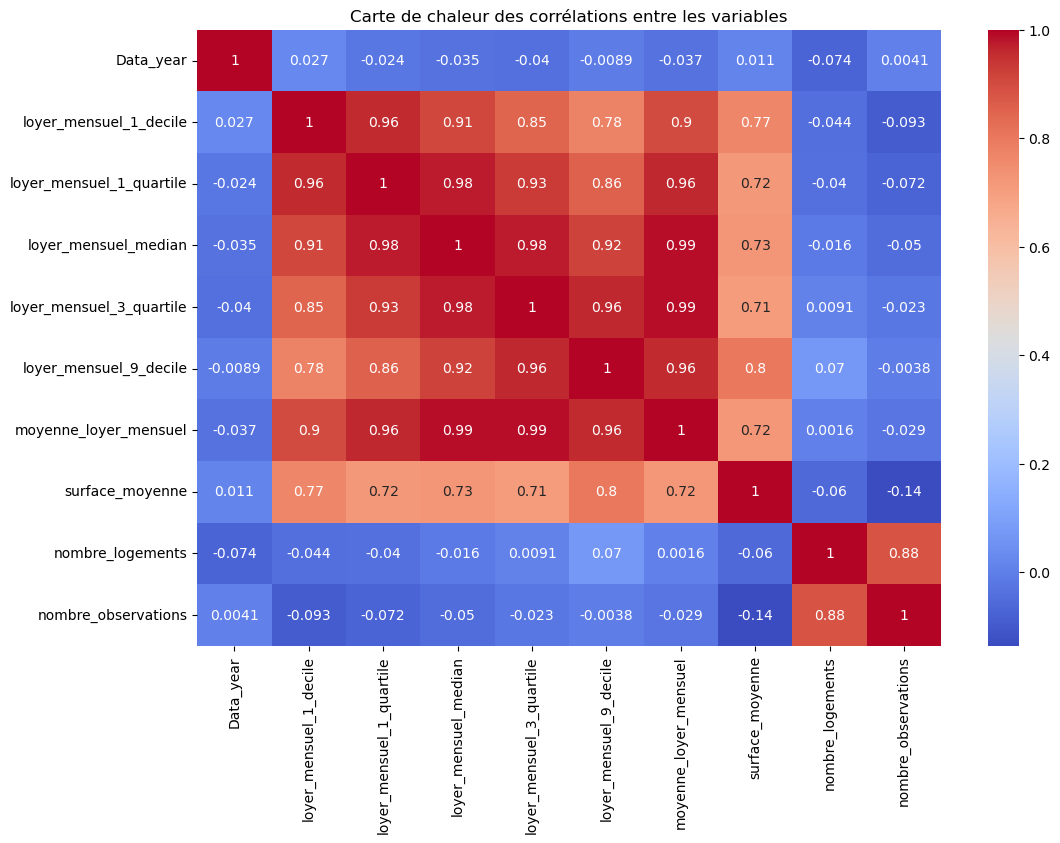

In [12]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Visualiser la matrice de corrélation à l'aide d'une carte de chaleur
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Carte de chaleur des corrélations entre les variables")
plt.show()

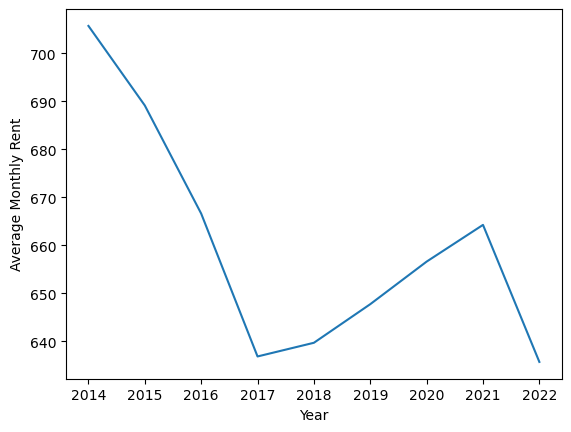

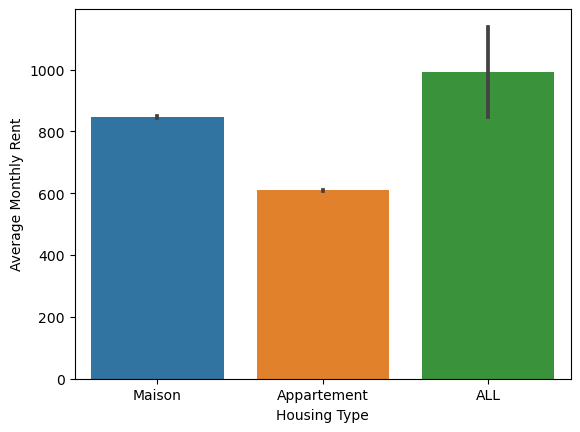

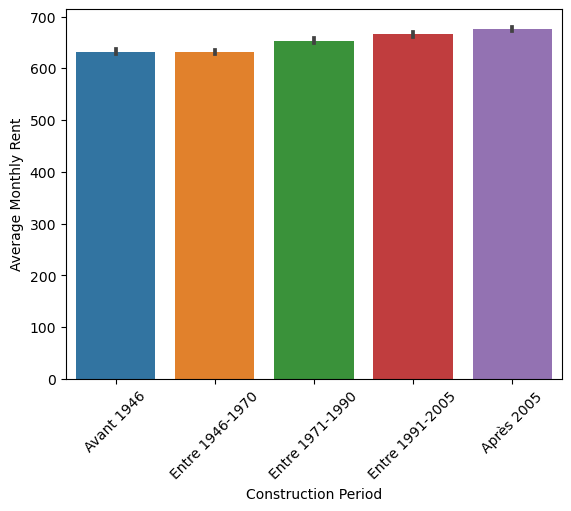

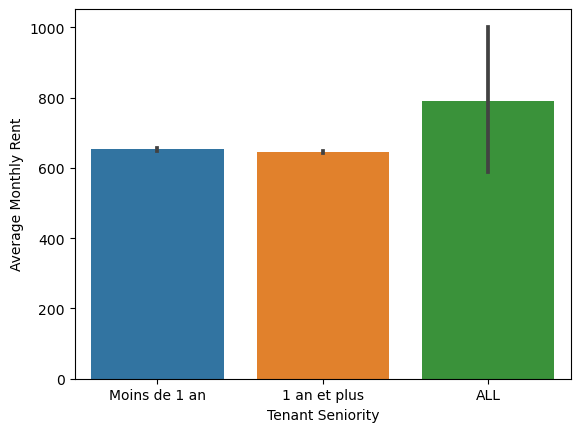

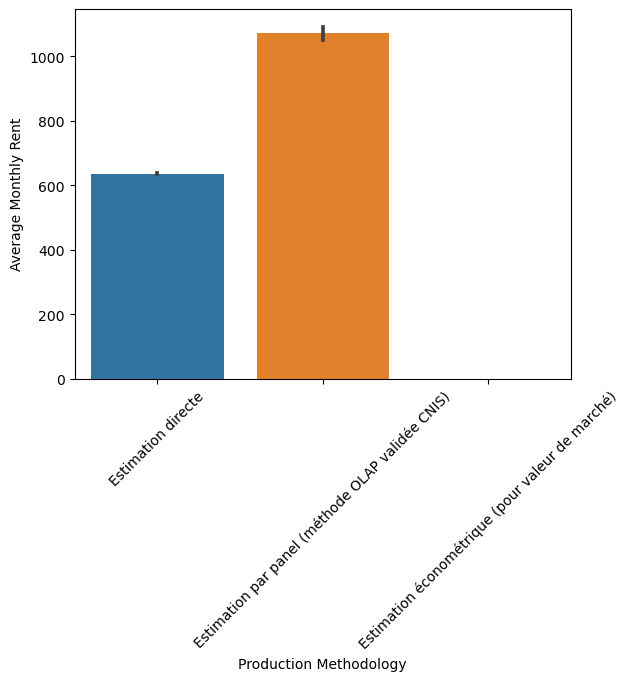

In [13]:
# 1. Évolution du loyer moyen sur la période étudiée
df_grouped_year = df.groupby('Data_year')['moyenne_loyer_mensuel'].mean().reset_index()
plt.plot(df_grouped_year['Data_year'], df_grouped_year['moyenne_loyer_mensuel'])
plt.xlabel('Year')
plt.ylabel('Average Monthly Rent')
plt.show()

# 2. Comparaison des loyers moyens par type d'habitat
sns.barplot(data=df, x='Type_habitat', y='moyenne_loyer_mensuel')
plt.xlabel('Housing Type')
plt.ylabel('Average Monthly Rent')
plt.show()

# 3. Loyer moyen par époque de construction
sns.barplot(data=df, x='epoque_construction_homogene', y='moyenne_loyer_mensuel')
plt.xlabel('Construction Period')
plt.ylabel('Average Monthly Rent')
plt.xticks(rotation=45)
plt.show()

# 4. Loyer moyen par ancienneté du locataire
sns.barplot(data=df, x='anciennete_locataire_homogene', y='moyenne_loyer_mensuel')
plt.xlabel('Tenant Seniority')
plt.ylabel('Average Monthly Rent')
plt.show()


# 5. Loyer moyen par méthodologie de production
sns.barplot(data=df, x='methodologie_production', y='moyenne_loyer_mensuel')
plt.xlabel('Production Methodology')
plt.ylabel('Average Monthly Rent')
plt.xticks(rotation=45)
plt.show()


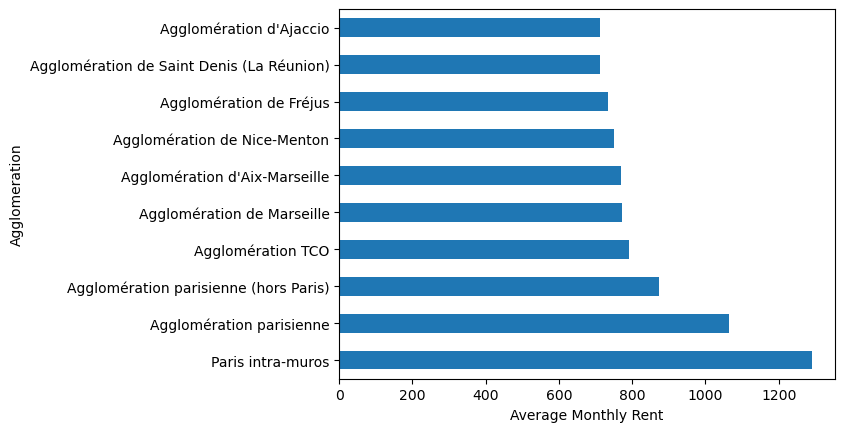

In [14]:
#Loyer moyen par agglomération (Top 10):
top_agglo = df.groupby('agglomeration')['moyenne_loyer_mensuel'].mean().sort_values(ascending=False).head(10)
top_agglo.plot(kind='barh')
plt.xlabel('Average Monthly Rent')
plt.ylabel('Agglomeration')
plt.show()


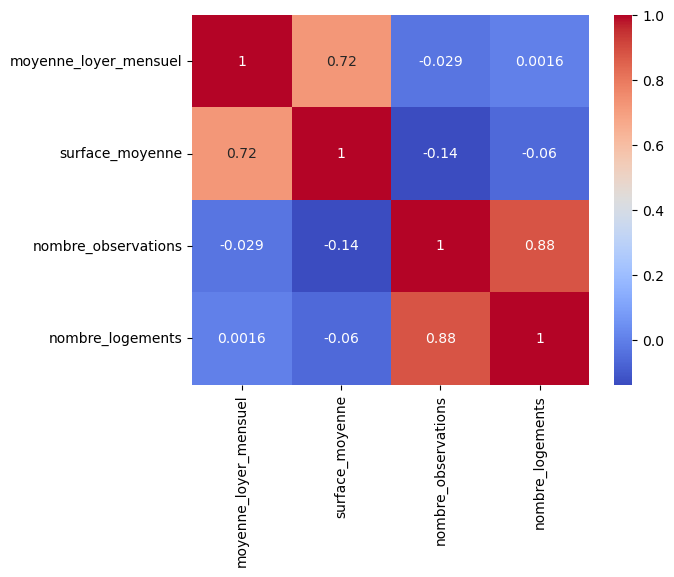

In [15]:
#Heatmap de corrélation entre les variables numériques:
numerical_columns = ['loyer_1_decile', 'loyer_1_quartile', 'loyer_median', 'loyer_3_quartile', 'loyer_9_decile', 'moyenne_loyer_mensuel', 'surface_moyenne', 'nombre_observations', 'nombre_logements']
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


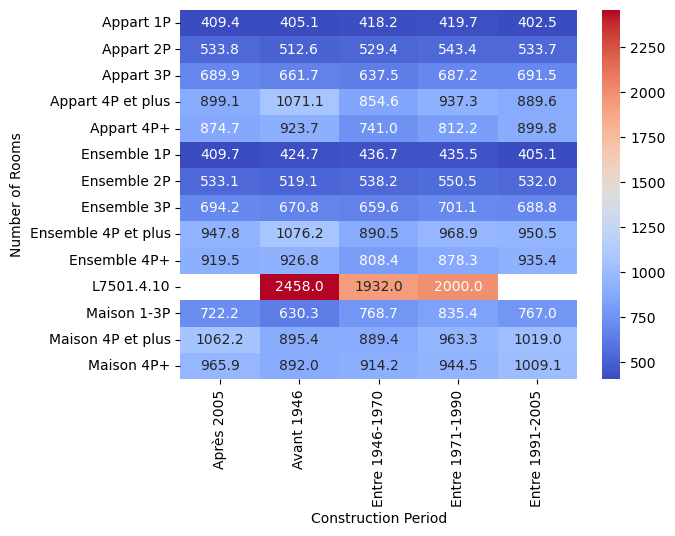

In [16]:
#Loyer moyen par époque de construction et nombre de pièces:
pivot_table = df.pivot_table(values='moyenne_loyer_mensuel', index='nombre_pieces_homogene', columns='epoque_construction_homogene', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='coolwarm')
plt.xlabel('Construction Period')
plt.ylabel('Number of Rooms')
plt.show()


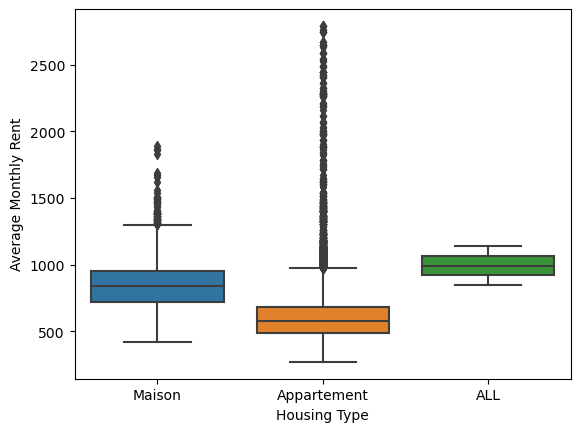

In [17]:
#Distribution des loyers moyens par type d'habitat:
sns.boxplot(data=df, x='Type_habitat', y='moyenne_loyer_mensuel')
plt.xlabel('Housing Type')
plt.ylabel('Average Monthly Rent')
plt.show()


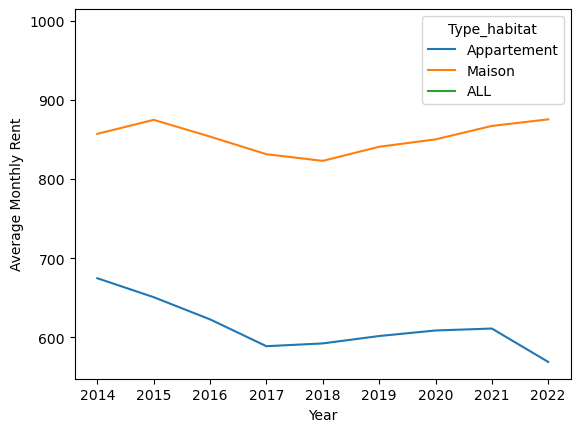

In [18]:
#Évolution du loyer moyen par type d'habitat au fil des ans:
df_grouped_year_type = df.groupby(['Data_year', 'Type_habitat'])['moyenne_loyer_mensuel'].mean().reset_index()
sns.lineplot(data=df_grouped_year_type, x='Data_year', y='moyenne_loyer_mensuel', hue='Type_habitat')
plt.xlabel('Year')
plt.ylabel('Average Monthly Rent')
plt.show()


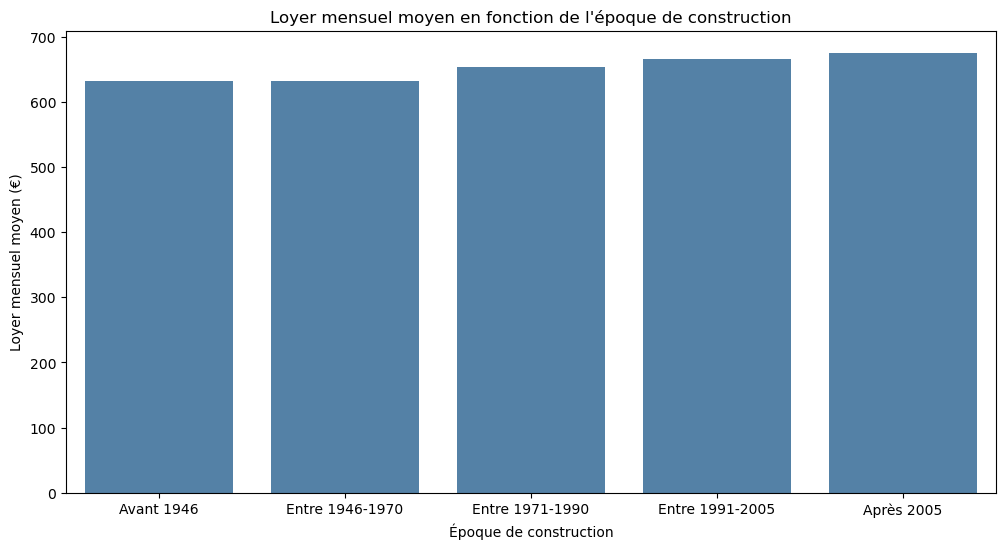

In [19]:
# On crée une copie du dataframe pour ne pas modifier l'original
df_copy = df.copy()

# On remplace les chiffres et les points avant chaque valeur des colonnes concernées
df_copy['epoque_construction_homogene'] = df_copy['epoque_construction_homogene'].str.replace(r'\d+\.', '', regex=True).str.strip()

# On supprime les lignes avec des valeurs 'other' pour la colonne 'epoque_construction_homogene'
valid_values = ['Avant 1946', 'Entre 1946-1970', 'Entre 1971-1990', 'Entre 1991-2005', 'Après 2005']
df_copy = df_copy[df_copy['epoque_construction_homogene'].isin(valid_values)]

# On crée un graphique à barres montrant le loyer mensuel moyen en fonction de l'époque de construction
# On crée un graphique à barres montrant le loyer mensuel moyen en fonction de l'époque de construction
plt.figure(figsize=(12, 6))
sns.barplot(data=df_copy, x='epoque_construction_homogene', y='moyenne_loyer_mensuel', ci=None, color='steelblue')
plt.title('Loyer mensuel moyen en fonction de l\'époque de construction')
plt.ylabel('Loyer mensuel moyen (€)')
plt.xlabel('Époque de construction')
plt.show()


In [20]:
df["nombre_pieces_homogene"].value_counts()

Appart 2P              5919
Appart 3P              5917
Appart 1P              5880
Maison 1-3P            5411
Appart 4P+             4543
Ensemble 3P            4369
Ensemble 2P            4367
Ensemble 1P            4356
Maison 4P+             4354
Ensemble 4P+           3237
Appart 4P et plus      1365
Maison 4P et plus      1189
Ensemble 4P et plus    1081
L7501.4.10               14
Maison                    2
Name: nombre_pieces_homogene, dtype: int64

In [21]:
import re

df["nombre_pieces_homogene"] = df["nombre_pieces_homogene"].replace(r' et plus', '+', regex=True)


C:\Users\33619\AppData\Local\Temp\ipykernel_8288\261951660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nombre_pieces_homogene"] = df["nombre_pieces_homogene"].replace(r' et plus', '+', regex=True)


In [22]:
df["nombre_pieces_homogene"].value_counts()

Appart 2P       5919
Appart 3P       5917
Appart 4P+      5908
Appart 1P       5880
Maison 4P+      5543
Maison 1-3P     5411
Ensemble 3P     4369
Ensemble 2P     4367
Ensemble 1P     4356
Ensemble 4P+    4318
L7501.4.10        14
Maison             2
Name: nombre_pieces_homogene, dtype: int64

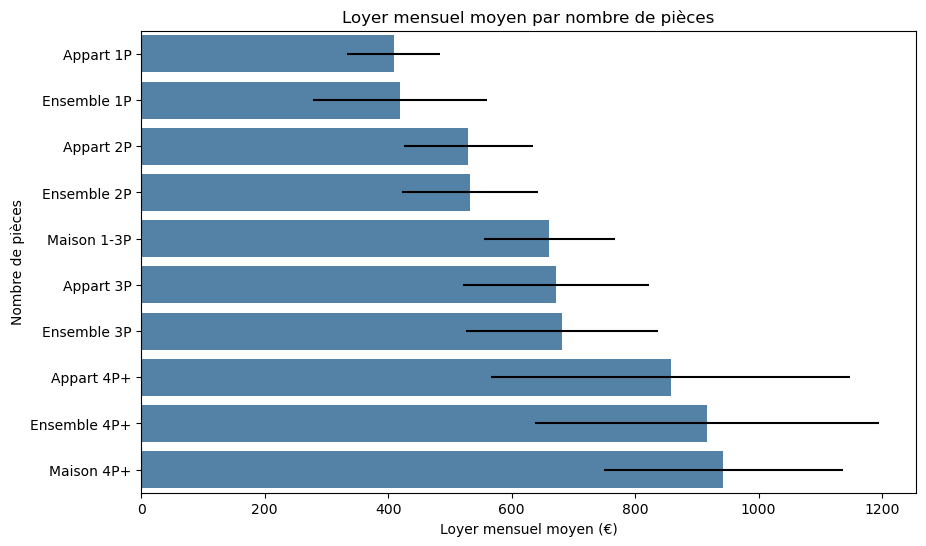

In [23]:
filtered_df = df[df['nombre_pieces_homogene'] != 'L7501.4.10']
grouped_mean = filtered_df.groupby('nombre_pieces_homogene')['moyenne_loyer_mensuel'].mean().reset_index()
grouped_std = filtered_df.groupby('nombre_pieces_homogene')['moyenne_loyer_mensuel'].agg(lambda x: x.dropna().std()).reset_index()
grouped = pd.merge(grouped_mean, grouped_std, on='nombre_pieces_homogene', suffixes=('_mean', '_std'))
grouped = grouped.sort_values(by='moyenne_loyer_mensuel_mean')

# Filter out rows with NaN values in the 'moyenne_loyer_mensuel_std' column
grouped = grouped.dropna(subset=['moyenne_loyer_mensuel_std'])

plt.figure(figsize=(10, 6))
sns.barplot(y='nombre_pieces_homogene', x='moyenne_loyer_mensuel_mean', data=grouped, color='steelblue', xerr=grouped['moyenne_loyer_mensuel_std'], capsize=0.1)
plt.ylabel("Nombre de pièces")
plt.xlabel("Loyer mensuel moyen (€)")
plt.title("Loyer mensuel moyen par nombre de pièces")
plt.show()


In [24]:
df_complémentaire = pd.read_csv("temperature-quotidienne-departementale.csv", sep=';')
df_complémentaire.rename(columns = {"TMin (°C)": "TMin"}, inplace=True)
df_complémentaire.rename(columns = {"TMax (°C)": "TMax"}, inplace=True)
df_complémentaire.rename(columns = {"TMoy (°C)": "TMoy"}, inplace=True)
df_complémentaire.head()

,Date,Code INSEE département,Département,TMin,TMax,TMoy
0,2019-10-22,21,Côte-d'Or,10.90,16.00,13.45
1,2019-10-22,73,Savoie,11.70,18.65,15.18
2,2019-10-22,29,Finistère,7.77,15.48,11.63
3,2019-10-22,48,Lozère,9.70,16.50,13.10
4,2019-10-22,49,Maine-et-Loire,4.40,15.10,9.75


In [41]:
departements_selectionnes = ['29', '36', '83', '54', '30', '31', '56', '13', '61', '25', '59', '69', '34', '44', '06', '35', '974', '75', '42', '43', '64', '77', "95"]
df_complémentaire_selection = df_complémentaire[df_complémentaire['Code INSEE département'].isin(departements_selectionnes)]
df_complémentaire_selection

,Date,Code INSEE département,Département,TMin,TMax,TMoy
2,2019-10-22,29,Finistère,7.77,15.48,11.63
5,2019-10-23,83,Var,18.56,22.28,20.42
6,2019-10-23,36,Indre,11.40,17.50,14.45
11,2019-10-23,42,Loire,11.75,14.90,13.32
20,2019-10-23,35,Ille-et-Vilaine,9.40,15.35,12.38
...,...,...,...,...,...,...
186802,2023-04-30,36,Indre,8.70,19.30,14.00
186808,2023-04-30,43,Haute-Loire,9.00,17.20,13.10
186809,2023-04-30,75,Paris,8.90,19.80,14.35
186811,2023-04-30,83,Var,14.81,18.63,16.72


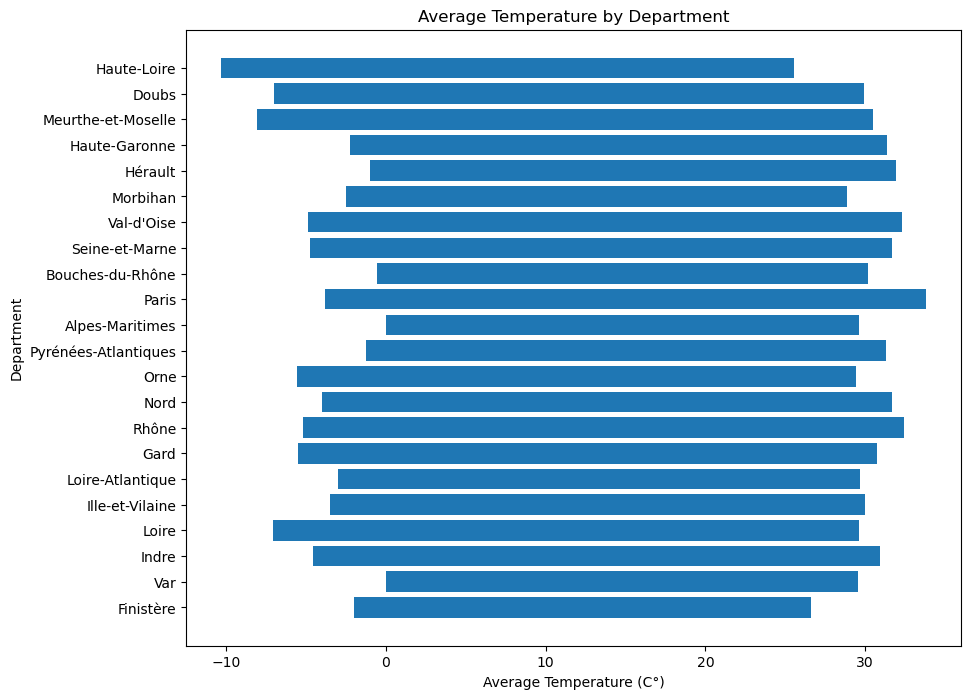

In [44]:
# Create the bar chart
plt.figure(figsize=(10, 8))
plt.barh(df_complémentaire_selection['Département'], df_complémentaire_selection['TMoy'])
plt.xlabel('Average Temperature (C°)')
plt.ylabel('Department')
plt.title('Average Temperature by Department')
plt.show()
